In [1]:
import pandas as pd
import datetime as datetime
import pprint
import os
import psycopg2
import requests
import boto3
import dotenv
from requests import get 
from bs4 import BeautifulSoup
from urllib.parse import urlparse, parse_qs, urlunparse
from bson.json_util import dumps
from IPython.display import display, Image
from IPython.display import HTML

# An example of getting current date

currDate = datetime.datetime.now()
 
print(currDate)

2023-06-18 09:13:22.711209


In [2]:
# Load the environment variables from the .env file
dotenv.load_dotenv()

scrape_url = os.getenv('SCRAPE_URL')
# print(scrape_url)

POSTGRES_URL = os.environ.get('POSTGRES_URL')
# print(POSTGRES_URL)

FINAL_POSTGRES_URL = os.environ.get('FINAL_POSTGRES_URL')
# print(POSTGRES_URL)


In [3]:
response = requests.get(scrape_url)

# Create BeautifulSoup object
soup = BeautifulSoup(response.text, "html.parser")

body_tag = soup.body

# print(body_tag)

In [4]:
img_tags = soup.find_all("img")
img_tags

[<img src="//eproof.drudgereport.com/pixel.gif" style="visibility: collapse;"/>,
 <img src="https://pbs.twimg.com/media/Fy1XV9lXwAIV4M3?format=jpg&amp;name=small" width="350"/>,
 <img src="https://pbs.twimg.com/media/Fy6N1F1WYAQxYfl?format=jpg&amp;name=small" width="500"/>,
 <img border="0" height="85" src="/i/logo9.gif" width="610"/>,
 <img src="https://pbs.twimg.com/media/Fy50vaRWcAAh9Ny?format=jpg&amp;name=small" width="200"/>,
 <img src="https://pbs.twimg.com/media/FyyrliwagAAFmnP?format=jpg&amp;name=small" width="200"/>,
 <img src="https://pbs.twimg.com/media/Fy1vCVVWcAIu8Jz?format=jpg&amp;name=360x360" width="200"/>,
 <img src="https://pbs.twimg.com/media/Fy17y-DWcAEV8kP?format=jpg&amp;name=small" width="200"/>,
 <img src="https://pbs.twimg.com/media/Fy1fnIiX0AEEj14?format=jpg&amp;name=360x360" width="200"/>,
 <img src="https://pbs.twimg.com/media/Fy5ca7RXgAAbDIt?format=jpg&amp;name=small" width="200"/>]

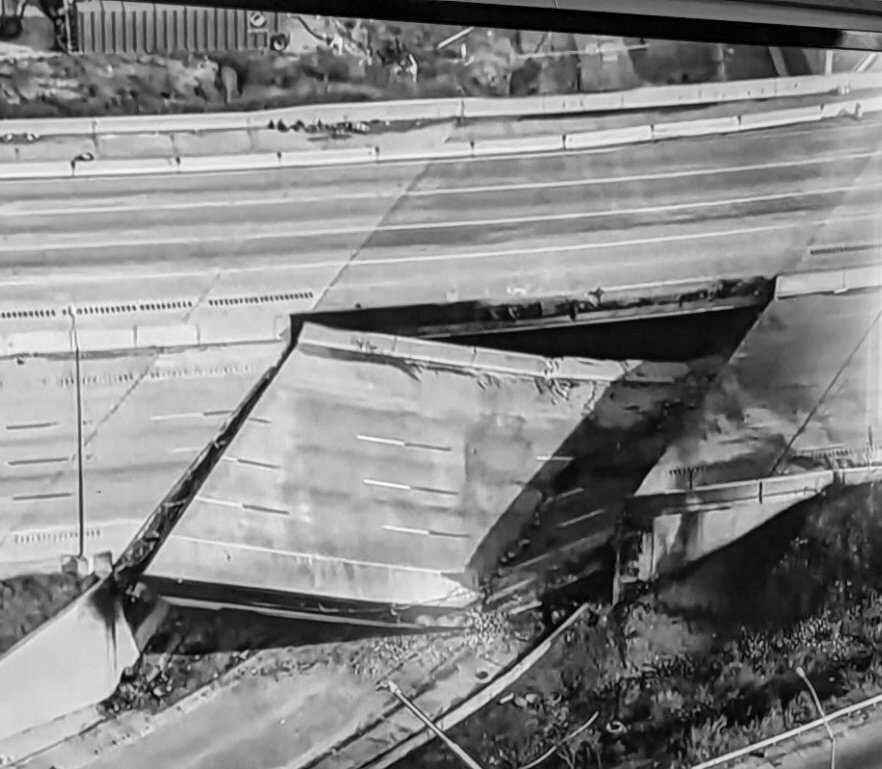

In [5]:
example_img = "https://pbs.twimg.com/media/FyV7PAEWwAADDKD.jpg"
# display(Image(example_img))
display(Image(example_img, width=200))


In [6]:
# webp file type

new_url = "https://th.bing.com/th/id/OIP.nRbbi2YXG-QUVWIcF34ElAHaLG"
# display(Image(example_img))
from IPython.display import HTML, display

new_url_with_extension = new_url
print(new_url_with_extension)

# Generate HTML code to display the image with width set to 200 pixels
html_code = f'<img src="{new_url_with_extension}" width="200">'
print(html_code)

print("display the html image BEGIN")
display(HTML(html_code))
print("display the html image END")


https://th.bing.com/th/id/OIP.nRbbi2YXG-QUVWIcF34ElAHaLG
<img src="https://th.bing.com/th/id/OIP.nRbbi2YXG-QUVWIcF34ElAHaLG" width="200">
display the html image BEGIN


display the html image END


jpg
https://pbs.twimg.com/media/Fy1XV9lXwAIV4M3
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/Fy1XV9lXwAIV4M3', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['small']}
Fy1XV9lXwAIV4M3
https://pbs.twimg.com/media/Fy1XV9lXwAIV4M3.jpg


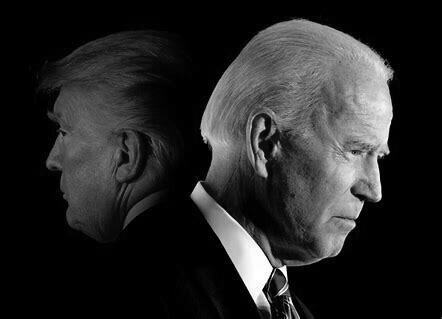

Content size of https://pbs.twimg.com/media/Fy1XV9lXwAIV4M3.jpg: 13921 bytes


jpg
https://pbs.twimg.com/media/Fy6N1F1WYAQxYfl
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/Fy6N1F1WYAQxYfl', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['small']}
Fy6N1F1WYAQxYfl
https://pbs.twimg.com/media/Fy6N1F1WYAQxYfl.jpg


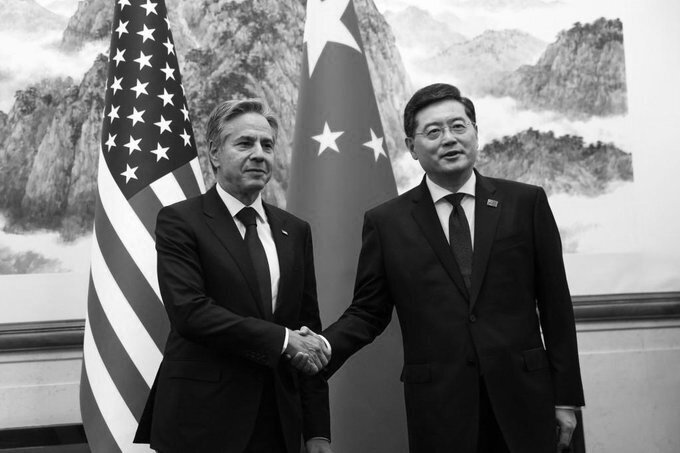

Content size of https://pbs.twimg.com/media/Fy6N1F1WYAQxYfl.jpg: 48376 bytes


jpg
https://pbs.twimg.com/media/Fy50vaRWcAAh9Ny
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/Fy50vaRWcAAh9Ny', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['small']}
Fy50vaRWcAAh9Ny
https://pbs.twimg.com/media/Fy50vaRWcAAh9Ny.jpg


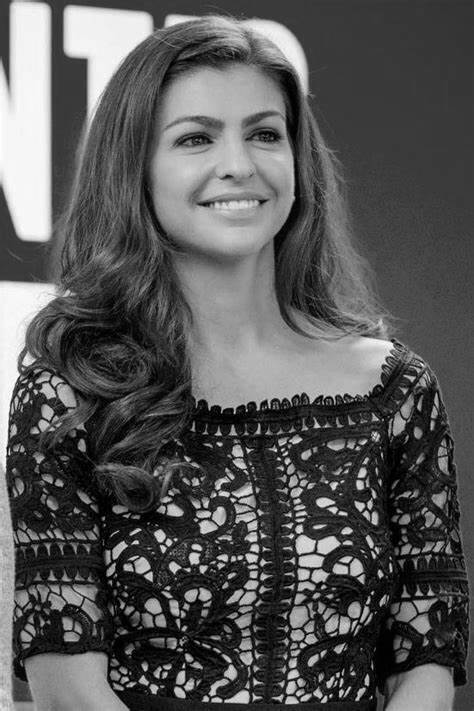

Content size of https://pbs.twimg.com/media/Fy50vaRWcAAh9Ny.jpg: 54008 bytes


jpg
https://pbs.twimg.com/media/FyyrliwagAAFmnP
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/FyyrliwagAAFmnP', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['small']}
FyyrliwagAAFmnP
https://pbs.twimg.com/media/FyyrliwagAAFmnP.jpg


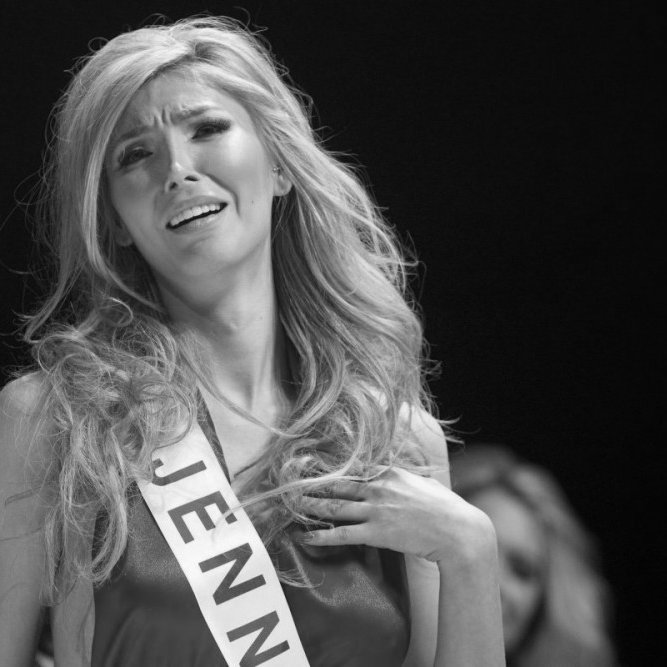

Content size of https://pbs.twimg.com/media/FyyrliwagAAFmnP.jpg: 61955 bytes


jpg
https://pbs.twimg.com/media/Fy1vCVVWcAIu8Jz
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/Fy1vCVVWcAIu8Jz', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['360x360']}
Fy1vCVVWcAIu8Jz
https://pbs.twimg.com/media/Fy1vCVVWcAIu8Jz.jpg


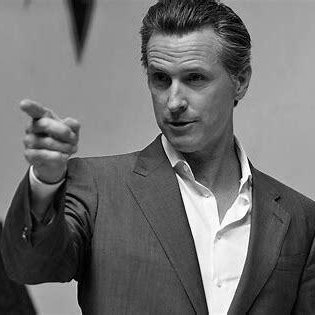

Content size of https://pbs.twimg.com/media/Fy1vCVVWcAIu8Jz.jpg: 18390 bytes


jpg
https://pbs.twimg.com/media/Fy17y-DWcAEV8kP
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/Fy17y-DWcAEV8kP', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['small']}
Fy17y-DWcAEV8kP
https://pbs.twimg.com/media/Fy17y-DWcAEV8kP.jpg


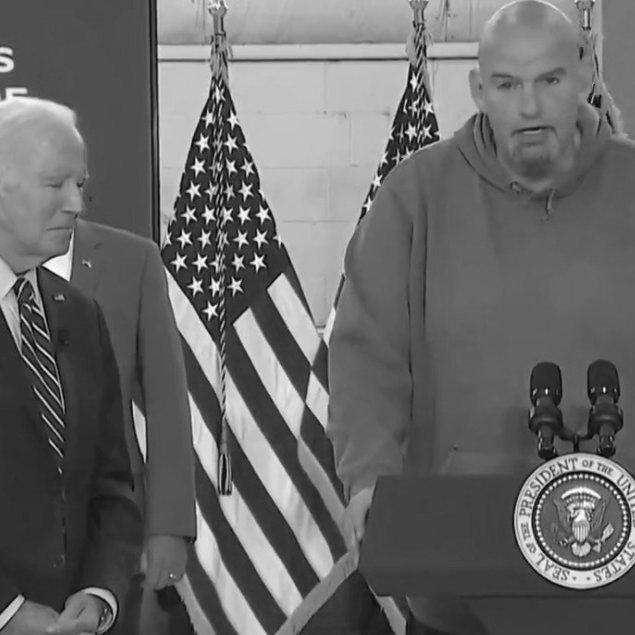

Content size of https://pbs.twimg.com/media/Fy17y-DWcAEV8kP.jpg: 52924 bytes


jpg
https://pbs.twimg.com/media/Fy1fnIiX0AEEj14
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/Fy1fnIiX0AEEj14', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['360x360']}
Fy1fnIiX0AEEj14
https://pbs.twimg.com/media/Fy1fnIiX0AEEj14.jpg


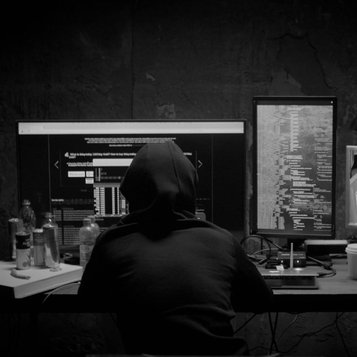

Content size of https://pbs.twimg.com/media/Fy1fnIiX0AEEj14.jpg: 18908 bytes


jpg
https://pbs.twimg.com/media/Fy5ca7RXgAAbDIt
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/Fy5ca7RXgAAbDIt', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['small']}
Fy5ca7RXgAAbDIt
https://pbs.twimg.com/media/Fy5ca7RXgAAbDIt.jpg


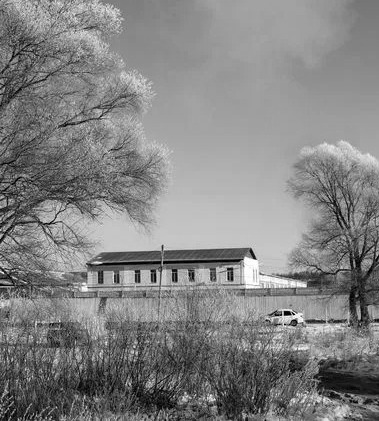

Content size of https://pbs.twimg.com/media/Fy5ca7RXgAAbDIt.jpg: 58188 bytes




In [7]:
# import os
# from urllib.parse import urlparse, parse_qs, urlunparse

for img in img_tags:
    src = img.get("src")
    if "https" in src:
        parsed_url = urlparse(src)
        query_params = parse_qs(parsed_url.query)
        extension = query_params.get('format', [''])[0]
        filename = os.path.basename(parsed_url.path)
        filename_with_extension = f"{filename}.{extension}"
        parsed_url = parsed_url._replace(query=None)
        new_url = urlunparse(parsed_url)

        print(extension)
        print(new_url)
        print(parsed_url)
        print(query_params)
        print(filename)
        # print(new_url_with_extension)

        if len(extension) > 0:
            # print("The extension is non-empty")
            new_url_with_extension = f"{new_url}.{extension}"
            print(new_url_with_extension)
            display(Image(new_url_with_extension, width=200))
            # file_size = os.path.getsize(new_url_with_extension)
            # print(file_size)
            # Send a HEAD request to retrieve the response headers
            response = requests.head(new_url_with_extension)
            # Get the content size from the response headers
            content_size = int(response.headers.get("Content-Length", 0))
            # Print the content size
            print(f"Content size of {new_url_with_extension}: {content_size} bytes")
        else:
            print("The extension is empty, omitting extension.")
            new_url_with_extension = new_url
            print(new_url_with_extension)
            # Send a HEAD request to retrieve the response headers
            response = requests.head(new_url_with_extension)
            # Get the content size from the response headers
            content_size = int(response.headers.get("Content-Length", 0))
            # Print the content size
            print(f"Content size of {new_url_with_extension}: {content_size} bytes")
            # Generate HTML code to display the image
            html_code = f'<img src="{new_url_with_extension}" width="200">'
            print(html_code)
            print("display the html image BEGIN")
            display(HTML(html_code))
            print("display the html image END")
    

        # display(Image(new_url_with_extension, width=200))
        print("\n")

        # print(extension)
        # print(new_url)
        # print(parsed_url)
        # print(query_params)
        # print(filename)
        # print(filename_with_extension)
        # display(Image(new_url + filename_with_extension.split('&')[0], width=200))


In [8]:
# Find all the lines (within <a> tags) in the webpage
lines = soup.find_all("a")

# Iterate over the lines and print line number, content, and type (link or image)
for i, line in enumerate(lines, start=1):
    line_content = line.get_text()
    line_type = "Link"
    line_url = line.get("href")

    if line.find("img"):
        line_type = "Image"

    print(f"Line {i}: {line_content} [{line_type}]")
    print(f"URL: {line_url}")

Line 1: ELECTION OF DREAD... [Link]
URL: https://www.wsj.com/articles/presidential-election-2024-biden-trump-2c1e9bcc
Line 2: DOWD: To Jail Trump or Not to Jail... [Link]
URL: https://dnyuz.com/2023/06/17/to-jail-or-not-to-jail/
Line 3: POLL:  56% believe he should end campaign... [Link]
URL: https://maristpoll.marist.edu/polls/the-trump-indictment/
Line 4: Lacked power to declassify nuke secrets... [Link]
URL: https://news.yahoo.com/trump-lacked-power-declassify-secret-100929256.html
Line 5: Can a president pardon himself? [Link]
URL: https://www.cbsnews.com/news/can-a-president-pardon-himself/
Line 6: BLINKEN IN BEIJING [Link]
URL: https://www.wsj.com/articles/after-months-of-cold-shoulder-china-welcomes-blinken-to-beijing-84b51627
Line 7:  [Image]
URL: https://www.drudgereport.com
Line 8: 20 shot at Illinois shopping mall Juneteenth celebration... [Link]
URL: https://www.dailymail.co.uk/news/article-12207611/Multiple-people-shot-Illinois-shopping-mall.html
Line 9: Extreme weather ta

In [16]:
import requests
from bs4 import BeautifulSoup
import psycopg2
from datetime import datetime

# Make a request to the webpage
scrape_url = os.getenv('SCRAPE_URL')
# print(scrape_url)
url = scrape_url  
response = requests.get(url)

# Create BeautifulSoup object
soup = BeautifulSoup(response.text, "html.parser")

# Find all the lines (within <a> tags) in the webpage
lines = soup.find_all("a")

# Connect to the PostgreSQL database
# conn = psycopg2.connect(
#     host="your_host",
#     database="your_database",
#     user="your_user",
#     password="your_password"
# )

FINAL_POSTGRES_URL = os.environ.get('FINAL_POSTGRES_URL')
# print(POSTGRES_URL)

# Add 'sslmode=require' to the connection URL
# POSTGRES_URL += "?sslmode=require"

# print(POSTGRES_URL)

# Insert keyboard interrupt to stop the execution
# raise KeyboardInterrupt

conn = psycopg2.connect(POSTGRES_URL)

cursor = conn.cursor()

# Initialize line_num as an integer
line_num = 0

current_datetime = datetime.now()
print(current_datetime)

# Iterate over the lines and insert/update each line into the database
for line in lines:
    line_content = line.get_text()
    line_type = "Link"
    line_url = line.get("href")

    # Increment line_num for each line
    line_num += 1

    if line.find("img"):
        line_type = "Image"
        line_content = line.get("src")
        print(f"Line {line_num}: Image found {line_content}")

    if bool(line_content):
        # Upsert the line into the database
        query = """
            INSERT INTO scraper_history (line_content, line_type, line_num, line_url, first_dt, latest_dt)
            VALUES (%s, %s, %s, %s, %s, %s)
            ON CONFLICT (line_content, line_url) DO UPDATE
            SET latest_dt = EXCLUDED.latest_dt
            WHERE scraper_history.line_content = EXCLUDED.line_content
            AND scraper_history.line_url = EXCLUDED.line_url
        """
        data = (line_content, line_type, line_num, line_url, current_datetime, current_datetime)
        cursor.execute(query, data)

# Commit the changes and close the database connection
conn.commit()
cursor.close()
conn.close()


2023-06-18 09:47:53.542381
Line 7: Image found None


### Update departed boolean

In [17]:
### Update departed boolean
import psycopg2

current_datetime = datetime.now()
print(current_datetime)

conn = psycopg2.connect(POSTGRES_URL)

cursor = conn.cursor()

query = """
update scraper_history
set departed = true,
    perm_link = false
where id in (
select id
from  scraper_history
where latest_dt < (
  select max(latest_dt) 
  from scraper_history
  ))
"""
cursor.execute(query)

# where departed = false

# Commit the changes and close the database connection
conn.commit()
cursor.close()
conn.close()


2023-06-18 09:47:59.520931


### Update perm_link boolean

In [18]:
### Update perm_link boolean
import psycopg2

current_datetime = datetime.now()
print(current_datetime)

conn = psycopg2.connect(POSTGRES_URL)

cursor = conn.cursor()

query = """
update  scraper_history
set     perm_link = TRUE
where id in (
select id
from  scraper_history
where departed = FALSE
and   perm_link = FALSE
and   latest_dt = (
 select max(latest_dt) 
 from scraper_history
 )
and   first_dt = (
 select min(first_dt) 
 from scraper_history
 ))
"""
cursor.execute(query)

# Commit the changes and close the database connection
conn.commit()
cursor.close()
conn.close()

2023-06-18 09:47:59.835051


### Update duration_secs

In [19]:
### Update duration_secs
import psycopg2

current_datetime = datetime.now()
print(current_datetime)

conn = psycopg2.connect(POSTGRES_URL)

cursor = conn.cursor()

query = """
UPDATE scraper_history
SET duration_secs = EXTRACT(EPOCH FROM (latest_dt - first_dt))
"""

cursor.execute(query)

# Commit the changes and close the database connection
conn.commit()
cursor.close()
conn.close()

2023-06-18 09:48:00.149023


### Store the image in an S3 bucket

In [20]:
# import requests
# import boto3

# URL of the webp image
url = "https://th.bing.com/th/id/OIP.nRbbi2YXG-QUVWIcF34ElAHaLG"

# Send a GET request to the image URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Access the image content
    image_content = response.content

    # Store the image content in an S3 bucket
    s3 = boto3.client('s3')
    bucket_name = 'your-bucket-name'
    key = 'image.webp'  # Provide a desired key (filename) with the .webp extension
    s3.put_object(Body=image_content, Bucket=bucket_name, Key=key)

    print("Image successfully stored in S3.")

else:
    print("Failed to retrieve the image:", response.status_code)


NoCredentialsError: Unable to locate credentials